In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### **Load Dataset**

In [5]:
df = pd.read_excel("Data_Train.xlsx")
df.head() 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:

df.shape

(10683, 11)

In [7]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
df.describe(include=['object','int'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [10]:

df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
df.apply(lambda x: len(x.unique()))

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               129
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           6
Additional_Info      10
Price              1870
dtype: int64

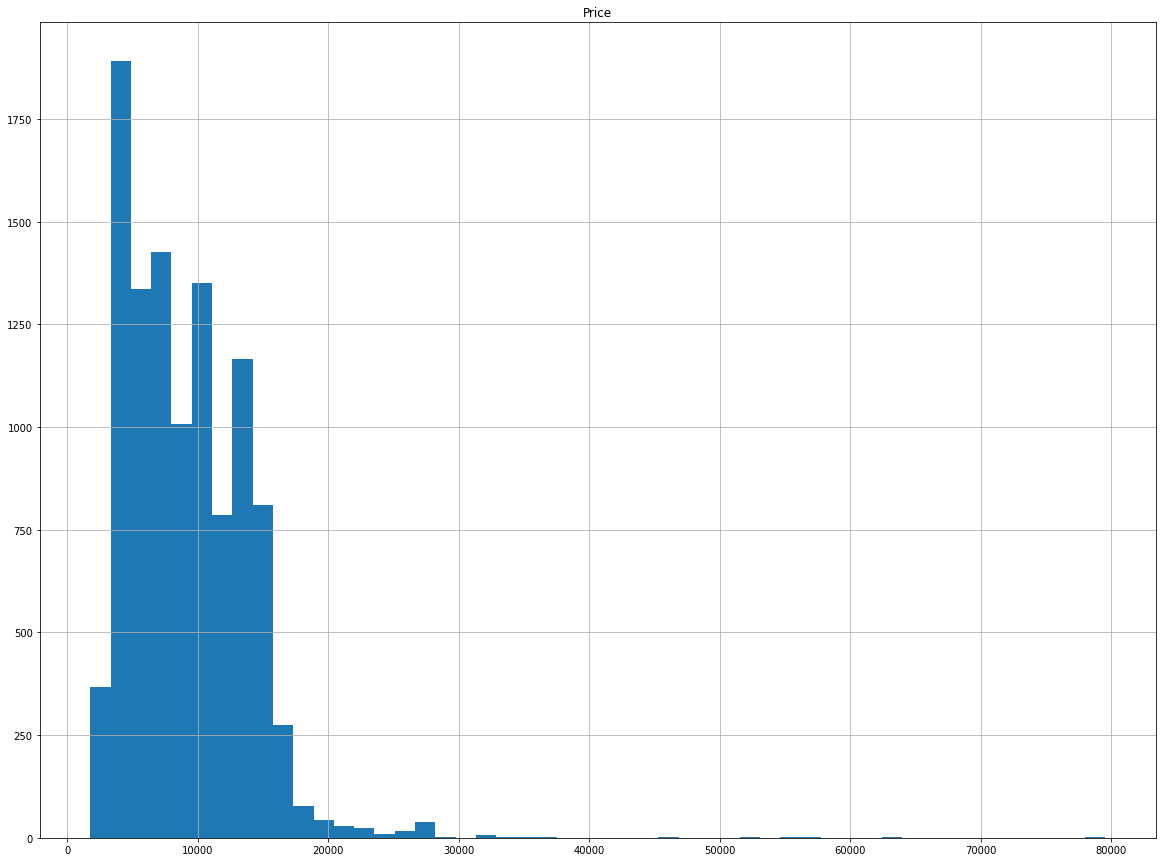

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
# Checking for categorical datatypes
cat_col=[]
for i in df.dtypes.index:
  if df.dtypes[i]=='object':
    cat_col.append(i)
cat_col

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [14]:
# Sorting according to date of journey
df.sort_values('Date_of_Journey', inplace = True)

In [15]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9848,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
6024,Air India,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,11:50,08:55 02 Mar,21h 5m,1 stop,1 Long layover,14594
2405,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,14:05,07:40 02 Mar,17h 35m,1 stop,1 Long layover,22270
10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
8308,IndiGo,01/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,12649


In [16]:
# Addidng Date,Month and Year column
df['year'] = pd.DatetimeIndex(df['Date_of_Journey']).year
df['month'] = pd.DatetimeIndex(df['Date_of_Journey']).month
df['Day'] = pd.DatetimeIndex(df['Date_of_Journey']).day
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,Day
9848,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135,2019,1,3
6024,Air India,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,11:50,08:55 02 Mar,21h 5m,1 stop,1 Long layover,14594,2019,1,3
2405,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,14:05,07:40 02 Mar,17h 35m,1 stop,1 Long layover,22270,2019,1,3
10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890,2019,1,3
8308,IndiGo,01/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,12649,2019,1,3


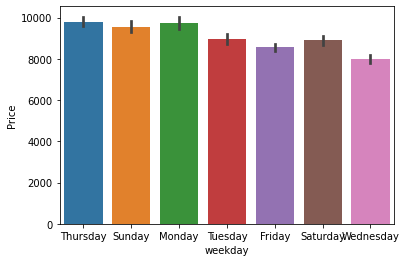

In [17]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['weekday']=df[['Date_of_Journey']].apply(lambda x:x.dt.day_name())
sns.barplot('weekday','Price',data=df)

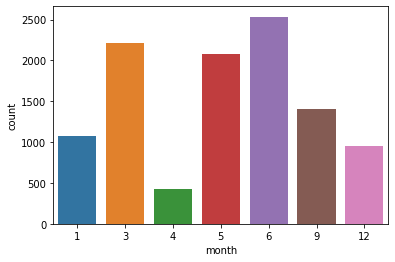

In [18]:
sns.countplot(df["month"])

In [19]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,Day,weekday
9039,Air India,2019-06-05,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480,2019,6,5,Wednesday


In [20]:
# Dropping the Null valued row
df.dropna(axis=0, inplace=True)

In [21]:
def stops_into_number(x):
  if x=='1 stop':
    return 1
  elif x=='2 stops':
    return 2
  elif x=='3 stops':
    return 3
  elif x=='4 stops':
    return 4
  else:
    return 0


In [22]:
df['Total_Stops']=df['Total_Stops'].apply(lambda x: stops_into_number(x))

In [23]:
df['Total_Stops']

9848     2
6024     1
2405     1
10383    1
8308     0
        ..
2875     1
2874     1
2873     1
6479     0
7297     2
Name: Total_Stops, Length: 10682, dtype: int64

In [24]:
df.fillna(0, inplace  = True)
df['Total_Stops'] = df['Total_Stops'].apply(lambda x : int(x))
df['Total_Stops']

9848     2
6024     1
2405     1
10383    1
8308     0
        ..
2875     1
2874     1
2873     1
6479     0
7297     2
Name: Total_Stops, Length: 10682, dtype: int64

In [25]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,Day,weekday
9848,Air India,2019-01-03,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2,No info,17135,2019,1,3,Thursday
6024,Air India,2019-01-03,Banglore,New Delhi,BLR → MAA → DEL,11:50,08:55 02 Mar,21h 5m,1,1 Long layover,14594,2019,1,3,Thursday
2405,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,14:05,07:40 02 Mar,17h 35m,1,1 Long layover,22270,2019,1,3,Thursday
10383,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1,No info,26890,2019,1,3,Thursday
8308,IndiGo,2019-01-03,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,0,No info,12649,2019,1,3,Thursday


In [26]:
# Classification of time in morning, evening, afternoon, mid-night
def conversion(x):
  if int(x[:2]) >= 0 and int(x[:2]) < 6:
      return 'mid_night'
  elif int(x[:2]) >= 6 and int(x[:2]) < 12:
      return 'morning'
  elif int(x[:2]) >= 12 and int(x[:2]) < 18:
      return 'afternoon'
  elif int(x[:2]) >= 18 and int(x[:2]) < 24:
      return 'evening'


In [27]:
df['Flight_Time']=df['Dep_Time'].apply(lambda x: conversion(x))

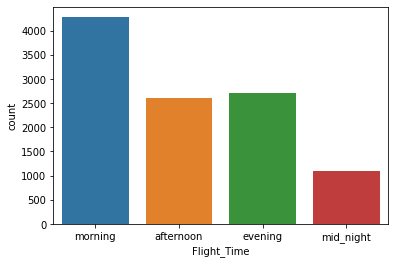

In [28]:
sns.countplot(df['Flight_Time'])

In [29]:
df['Airline'].unique()

array(['Air India', 'Jet Airways', 'IndiGo', 'Jet Airways Business',
       'Air Asia', 'SpiceJet', 'Vistara', 'GoAir',
       'Vistara Premium economy', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

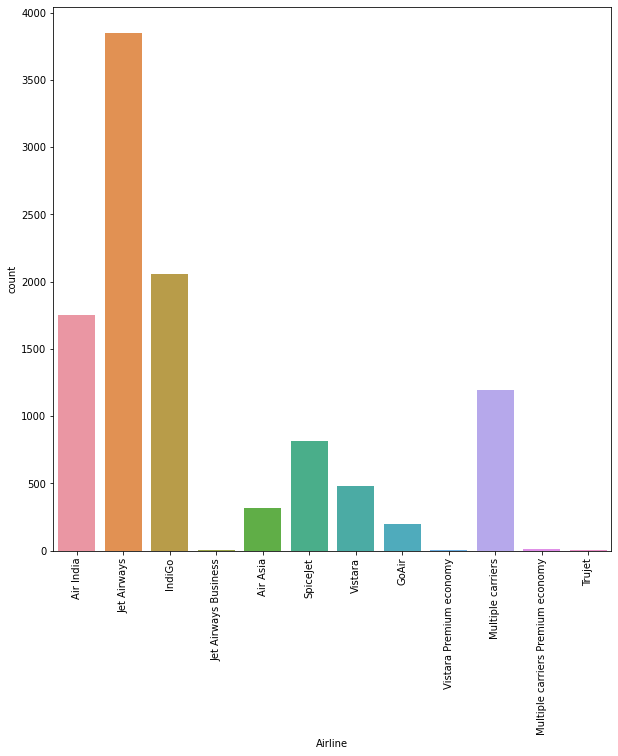

In [30]:
plt.figure(figsize = (10, 10))
sns.countplot(df['Airline'])
plt.xticks(rotation = 90)

In [31]:
df['Airline'].replace(['Trujet', 'Vistara Premium economy'], 'Another', inplace = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

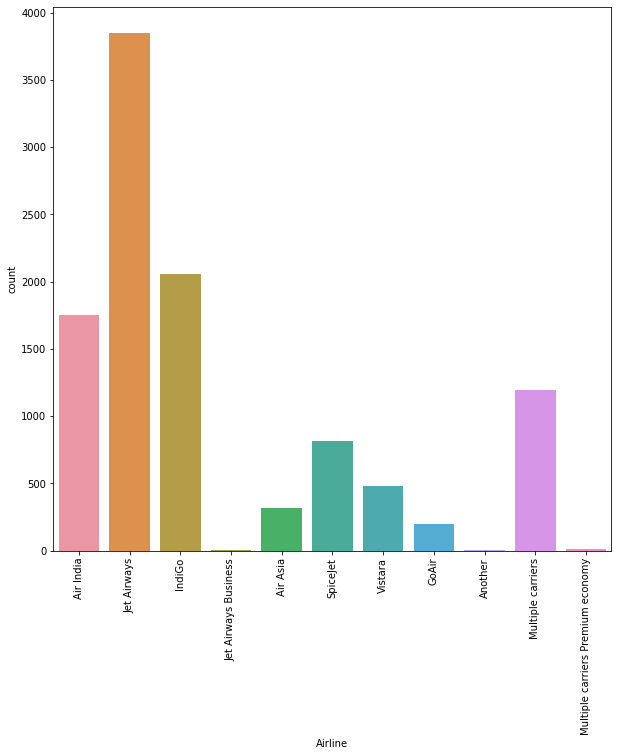

In [32]:
plt.figure(figsize = (10, 10))
sns.countplot(df['Airline'])
plt.xticks(rotation = 90)

In [33]:
df['Duration']

9848      39h 5m
6024      21h 5m
2405     17h 35m
10383     22h 5m
8308      2h 55m
          ...   
2875     12h 30m
2874     24h 40m
2873      27h 5m
6479      2h 55m
7297     23h 40m
Name: Duration, Length: 10682, dtype: object

In [34]:
# Duration to seconds
def duration_to_seconds(x):
  a=x.split(' ')
  count=0
  for i in range(len(a)):
    tp=''
    for j in a[i]:
      if j.isnumeric():
        tp+=j
      elif j=='h':
        k=0
        break
      elif j=='m':
        k=1
        break 
    if k==0:
        count+=int(tp)*60
    elif k==1:
        count+=int(tp)
  return count


In [35]:
df['Duration']=df['Duration'].apply(lambda x: duration_to_seconds(x))
df['Duration']

9848     2345
6024     1265
2405     1055
10383    1325
8308      175
         ... 
2875      750
2874     1480
2873     1625
6479      175
7297     1420
Name: Duration, Length: 10682, dtype: int64

In [36]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,Day,weekday,Flight_Time
9848,Air India,2019-01-03,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,2345,2,No info,17135,2019,1,3,Thursday,morning
6024,Air India,2019-01-03,Banglore,New Delhi,BLR → MAA → DEL,11:50,08:55 02 Mar,1265,1,1 Long layover,14594,2019,1,3,Thursday,morning
2405,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,14:05,07:40 02 Mar,1055,1,1 Long layover,22270,2019,1,3,Thursday,afternoon
10383,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,1325,1,No info,26890,2019,1,3,Thursday,morning
8308,IndiGo,2019-01-03,Banglore,New Delhi,BLR → DEL,18:25,21:20,175,0,No info,12649,2019,1,3,Thursday,evening


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

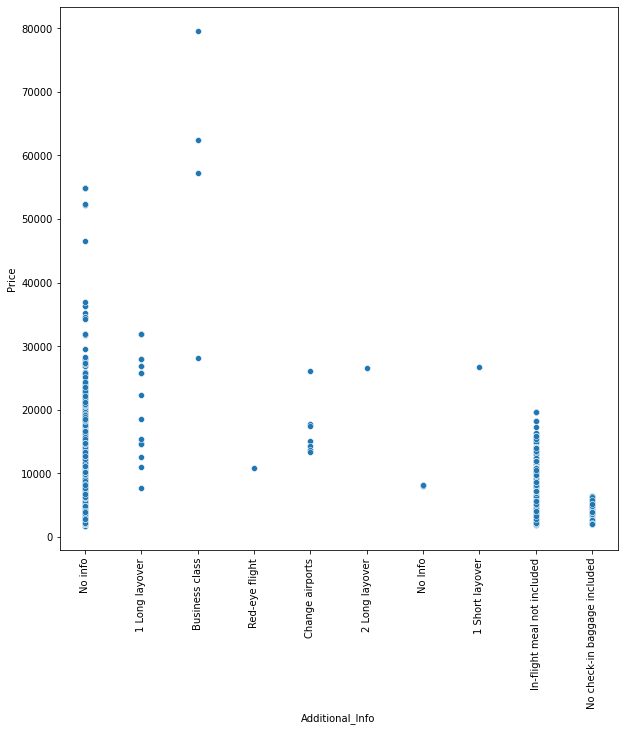

In [37]:
plt.figure(figsize = (10, 10))
sns.scatterplot(df['Additional_Info'],df['Price'])
plt.xticks(rotation = 90)

In [38]:
df['Additional_Info'].unique()

array(['No info', '1 Long layover', 'Business class', 'Red-eye flight',
       'Change airports', '2 Long layover', 'No Info', '1 Short layover',
       'In-flight meal not included', 'No check-in baggage included'],
      dtype=object)

In [39]:
df['Additional_Info']=df['Additional_Info'].str.replace('No info','No Info')
df['Additional_Info'].unique()

array(['No Info', '1 Long layover', 'Business class', 'Red-eye flight',
       'Change airports', '2 Long layover', '1 Short layover',
       'In-flight meal not included', 'No check-in baggage included'],
      dtype=object)

In [40]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,Day,weekday,Flight_Time
9848,Air India,2019-01-03,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,2345,2,No Info,17135,2019,1,3,Thursday,morning
6024,Air India,2019-01-03,Banglore,New Delhi,BLR → MAA → DEL,11:50,08:55 02 Mar,1265,1,1 Long layover,14594,2019,1,3,Thursday,morning
2405,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,14:05,07:40 02 Mar,1055,1,1 Long layover,22270,2019,1,3,Thursday,afternoon
10383,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,1325,1,No Info,26890,2019,1,3,Thursday,morning
8308,IndiGo,2019-01-03,Banglore,New Delhi,BLR → DEL,18:25,21:20,175,0,No Info,12649,2019,1,3,Thursday,evening


# Drping Some Columns

In [41]:
df.drop(['Route','Arrival_Time','Date_of_Journey','Dep_Time'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,year,month,Day,weekday,Flight_Time
9848,Air India,Banglore,New Delhi,2345,2,No Info,17135,2019,1,3,Thursday,morning
6024,Air India,Banglore,New Delhi,1265,1,1 Long layover,14594,2019,1,3,Thursday,morning
2405,Jet Airways,Banglore,New Delhi,1055,1,1 Long layover,22270,2019,1,3,Thursday,afternoon
10383,Jet Airways,Banglore,New Delhi,1325,1,No Info,26890,2019,1,3,Thursday,morning
8308,IndiGo,Banglore,New Delhi,175,0,No Info,12649,2019,1,3,Thursday,evening


### ***Co-relation Matrix***

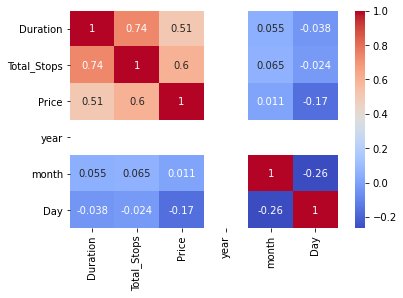

In [42]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

### **Label** **Encoding**

In [43]:
#Now lets encode the inputs using label encoder
# from sklearn.preprocessing import LabelEncoder
# cat_col = ['Airline','Source','Destination','Duration','Additional_Info','Total_Stops','Day','month','year','Flight_Time']
# le = LabelEncoder()
# for i in cat_col:
#     df[i] = le.fit_transform(df[i])
# df.head()

df = pd.get_dummies(df, columns = ['Airline', 'Source', 'Destination', 'Additional_Info', 'Flight_Time','month','weekday'])
pd.set_option('display.max_columns', 50)
df.head()

,Duration,Total_Stops,Price,year,Day,Airline_Air Asia,Airline_Air India,Airline_Another,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,...,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight,Flight_Time_afternoon,Flight_Time_evening,Flight_Time_mid_night,Flight_Time_morning,month_1,month_3,month_4,month_5,month_6,month_9,month_12,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
9848,2345,2,17135,2019,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6024,1265,1,14594,2019,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2405,1055,1,22270,2019,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
10383,1325,1,26890,2019,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8308,175,0,12649,2019,3,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [44]:
df.shape

(10682, 54)

In [45]:
# Dropping Duplicates
df = df.drop_duplicates()
df.shape

(10200, 54)

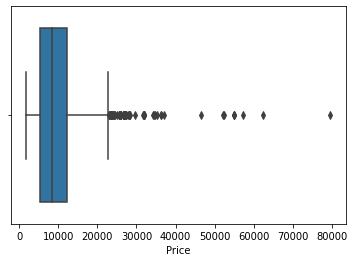

In [46]:
# Box-plot
sns.boxplot(df['Price'])

In [47]:
df.to_csv('final_data.csv', index = None)

### **Data for Model**

In [48]:
y = df['Price']
X = df.drop('Price', axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10200 entries, 9848 to 7297
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Duration                                      10200 non-null  int64
 1   Total_Stops                                   10200 non-null  int64
 2   year                                          10200 non-null  int64
 3   Day                                           10200 non-null  int64
 4   Airline_Air Asia                              10200 non-null  uint8
 5   Airline_Air India                             10200 non-null  uint8
 6   Airline_Another                               10200 non-null  uint8
 7   Airline_GoAir                                 10200 non-null  uint8
 8   Airline_IndiGo                                10200 non-null  uint8
 9   Airline_Jet Airways                           10200 non-null  uint8
 10  Airline_

Data Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X = pd.DataFrame(s.fit_transform(df),columns = df.columns)
X = X.drop('Price',axis=1)
X.head()

,Duration,Total_Stops,year,Day,Airline_Air Asia,Airline_Air India,Airline_Another,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,...,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight,Flight_Time_afternoon,Flight_Time_evening,Flight_Time_mid_night,Flight_Time_morning,month_1,month_3,month_4,month_5,month_6,month_9,month_12,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,3.397436,1.794271,0.0,-1.095058,-0.176159,2.251181,-0.019807,-0.138876,-0.481389,-0.744106,-0.024261,-0.364113,-0.035723,-0.289548,-0.217072,1.983003,-0.187944,-0.861107,-0.609525,-0.26684,-0.609525,-0.861107,-0.362384,-0.26684,-0.187944,...,-0.009902,-0.019807,-0.026206,-0.477832,0.529264,-0.174972,-0.009902,-0.571011,-0.579614,-0.336231,1.221998,2.975747,-0.513294,-0.202031,-0.491867,-0.552735,-0.390066,-0.314297,-0.453198,-0.402487,-0.35367,-0.331333,1.914695,-0.360129,-0.421698
1,1.244776,0.273702,0.0,-1.095058,-0.176159,2.251181,-0.019807,-0.138876,-0.481389,-0.744106,-0.024261,-0.364113,-0.035723,-0.289548,-0.217072,1.983003,-0.187944,-0.861107,-0.609525,-0.26684,-0.609525,-0.861107,-0.362384,-0.26684,-0.187944,...,-0.009902,-0.019807,-0.026206,-0.477832,-1.889416,-0.174972,-0.009902,-0.571011,-0.579614,-0.336231,1.221998,2.975747,-0.513294,-0.202031,-0.491867,-0.552735,-0.390066,-0.314297,-0.453198,-0.402487,-0.35367,-0.331333,1.914695,-0.360129,-0.421698
2,0.826203,0.273702,0.0,-1.095058,-0.176159,-0.444211,-0.019807,-0.138876,-0.481389,1.343894,-0.024261,-0.364113,-0.035723,-0.289548,-0.217072,1.983003,-0.187944,-0.861107,-0.609525,-0.26684,-0.609525,-0.861107,-0.362384,-0.26684,-0.187944,...,-0.009902,-0.019807,-0.026206,-0.477832,-1.889416,-0.174972,-0.009902,1.751281,-0.579614,-0.336231,-0.818332,2.975747,-0.513294,-0.202031,-0.491867,-0.552735,-0.390066,-0.314297,-0.453198,-0.402487,-0.35367,-0.331333,1.914695,-0.360129,-0.421698
3,1.364368,0.273702,0.0,-1.095058,-0.176159,-0.444211,-0.019807,-0.138876,-0.481389,1.343894,-0.024261,-0.364113,-0.035723,-0.289548,-0.217072,1.983003,-0.187944,-0.861107,-0.609525,-0.26684,-0.609525,-0.861107,-0.362384,-0.26684,-0.187944,...,-0.009902,-0.019807,-0.026206,-0.477832,0.529264,-0.174972,-0.009902,-0.571011,-0.579614,-0.336231,1.221998,2.975747,-0.513294,-0.202031,-0.491867,-0.552735,-0.390066,-0.314297,-0.453198,-0.402487,-0.35367,-0.331333,1.914695,-0.360129,-0.421698
4,-0.927816,-1.246866,0.0,-1.095058,-0.176159,-0.444211,-0.019807,-0.138876,2.077322,-0.744106,-0.024261,-0.364113,-0.035723,-0.289548,-0.217072,1.983003,-0.187944,-0.861107,-0.609525,-0.26684,-0.609525,-0.861107,-0.362384,-0.26684,-0.187944,...,-0.009902,-0.019807,-0.026206,-0.477832,0.529264,-0.174972,-0.009902,-0.571011,1.725285,-0.336231,-0.818332,2.975747,-0.513294,-0.202031,-0.491867,-0.552735,-0.390066,-0.314297,-0.453198,-0.402487,-0.35367,-0.331333,1.914695,-0.360129,-0.421698


In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Duration                                      10200 non-null  float64
 1   Total_Stops                                   10200 non-null  float64
 2   year                                          10200 non-null  float64
 3   Day                                           10200 non-null  float64
 4   Airline_Air Asia                              10200 non-null  float64
 5   Airline_Air India                             10200 non-null  float64
 6   Airline_Another                               10200 non-null  float64
 7   Airline_GoAir                                 10200 non-null  float64
 8   Airline_IndiGo                                10200 non-null  float64
 9   Airline_Jet Airways                           10200 non-null 

### **Model Testing**

In [51]:
# Splitting data into train and test data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from math import sqrt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [53]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [54]:
print("Train Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  732.7306987646042
R-squared:  0.9753330870741251


In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model,X,y):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("Train Results for Model:")
    print(50 * '-')
    print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
    print("R-squared: ", r2_score(y_train.values, y_train_pred))


    print(50*'#')
    print("Test Results for Decision Tree Regressor Model:")
    print(50 * '-')
    print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
    print("R-squared: ", r2_score(y_test, y_test_pred))




In [67]:
X.shape

(10200, 53)

In [68]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [69]:
y.shape

(10200,)

In [70]:
y.head()

9848     17135
6024     14594
2405     22270
10383    26890
8308     12649
Name: Price, dtype: int64

Train Results for Model:
--------------------------------------------------
Root mean squared error:  2505.9939182932526
R-squared:  0.7114732714411367
##################################################
Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  2621.6663192797328
R-squared:  0.6606755213124681


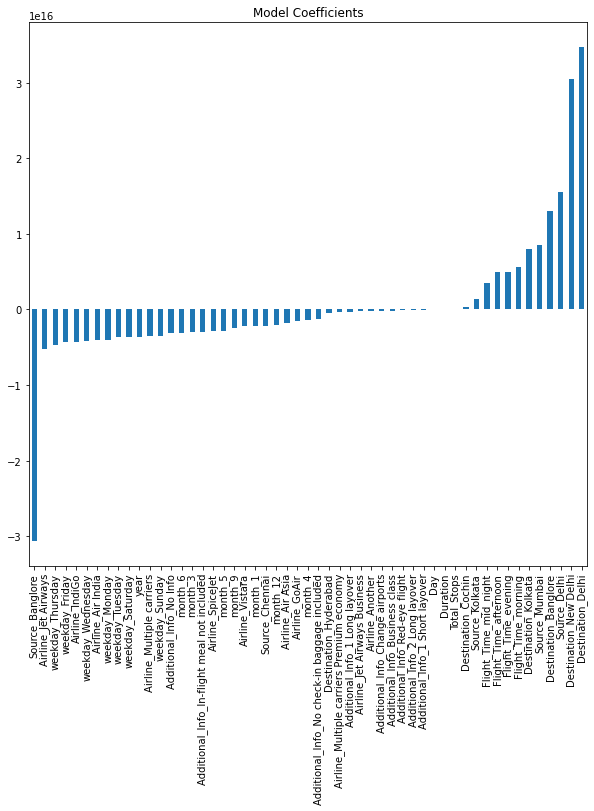

In [71]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
train(model, X, y)
plt.figure(figsize = (10, 10))
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Train Results for Model:
--------------------------------------------------
Root mean squared error:  2505.1098863992584
R-squared:  0.7116768009380577
##################################################
Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  2619.7665942106382
R-squared:  0.6611671091693343


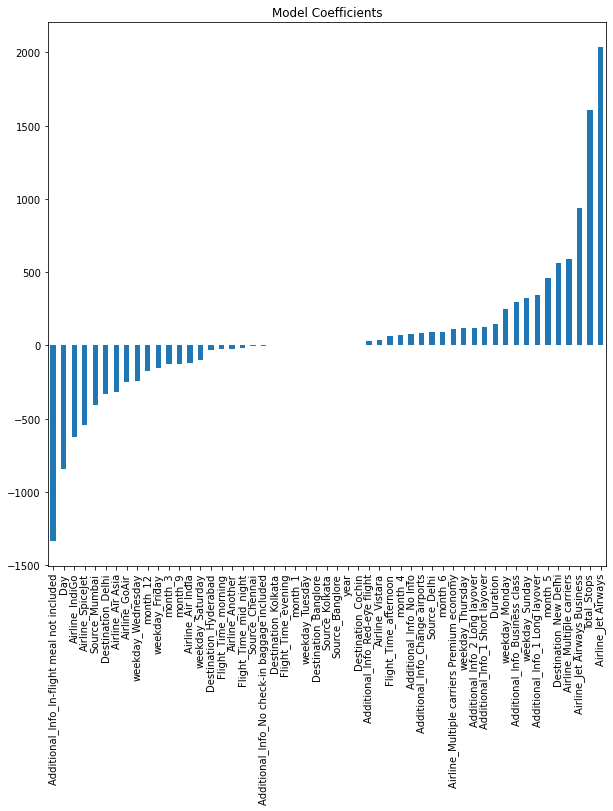

In [72]:
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
plt.figure(figsize = (10, 10))
coef.plot(kind='bar', title="Model Coefficients")

Train Results for Model:
--------------------------------------------------
Root mean squared error:  2956.7308238314513
R-squared:  0.5983483051915828
##################################################
Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  2998.159998200199
R-squared:  0.5562177046805246


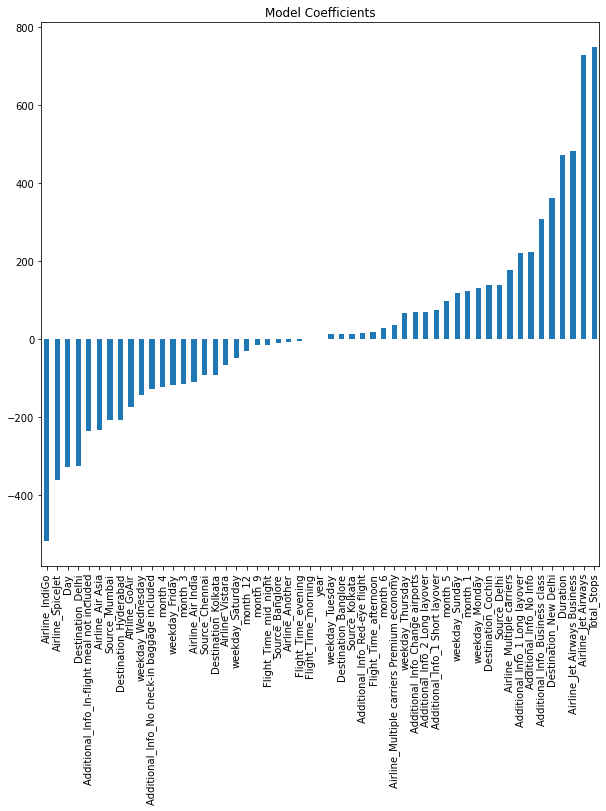

In [73]:
model = Ridge(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
plt.figure(figsize = (10, 10))
coef.plot(kind='bar', title="Model Coefficients")

Train Results for Model:
--------------------------------------------------
Root mean squared error:  392.4487763971092
R-squared:  0.9929239322098753
##################################################
Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  2184.383024464364
R-squared:  0.7644311038784346


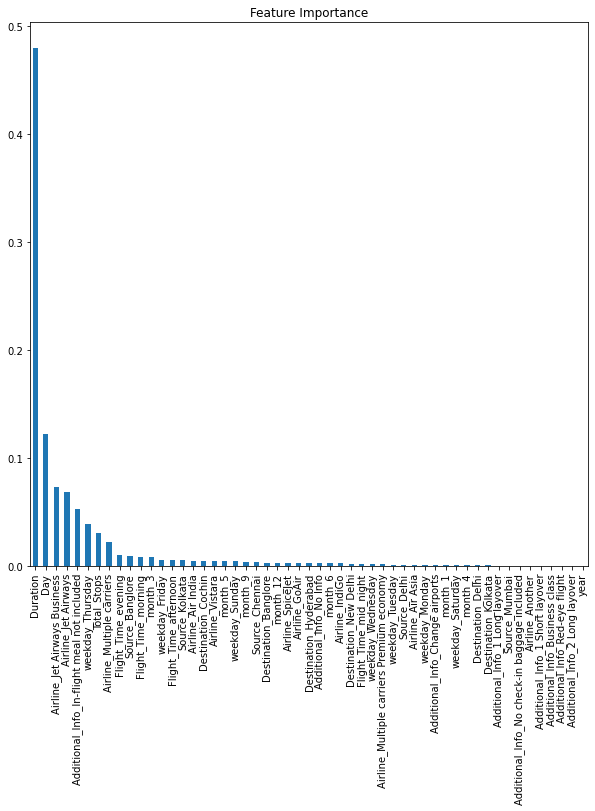

In [74]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
plt.figure(figsize = (10, 10))
coef.plot(kind='bar', title="Feature Importance")

Train Results for Model:
--------------------------------------------------
Root mean squared error:  730.6629517375774
R-squared:  0.9754721094152151
##################################################
Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  1756.4684640576477
R-squared:  0.8476855611678678


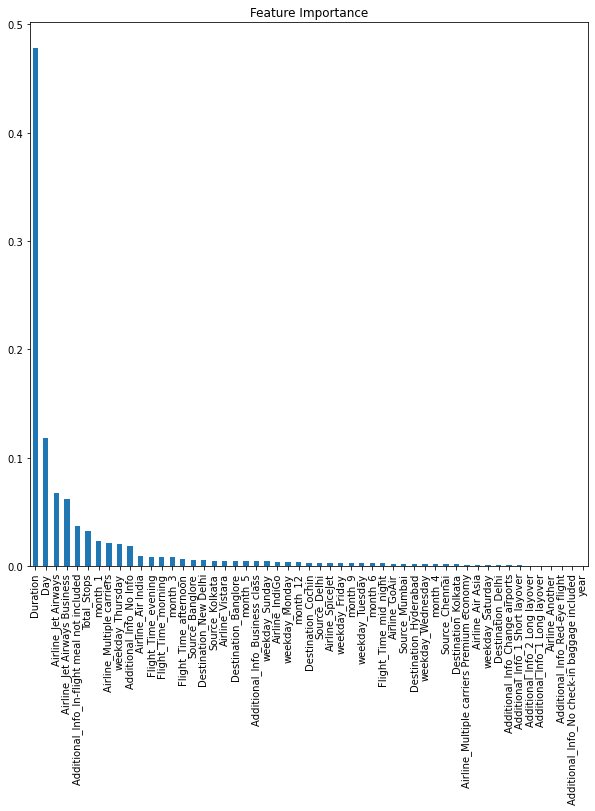

In [75]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
plt.figure(figsize = (10, 10))
coef.plot(kind='bar', title="Feature Importance")

Train Results for Model:
--------------------------------------------------
Root mean squared error:  392.4487763971092
R-squared:  0.9929239322098753
##################################################
Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  1995.3396396964865
R-squared:  0.803440507595266


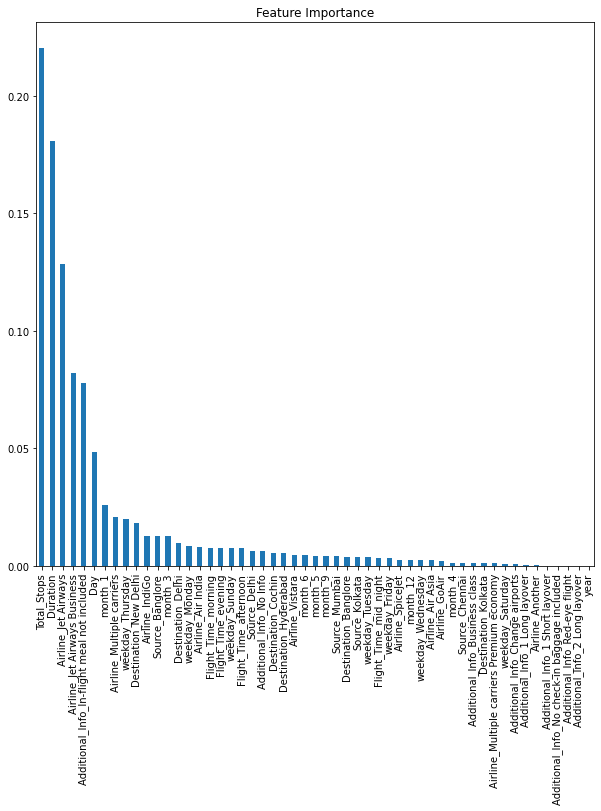

In [76]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
plt.figure(figsize = (10, 10))
coef.plot(kind='bar', title="Feature Importance")

### **Hyperparameter Tuning**

In [82]:
from sklearn.model_selection import RandomizedSearchCV
tuned_params = {'max_depth': [int(x) for x in np.linspace(5, 30, num = 6)],
                'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
                'max_features': ['auto', 'sqrt'],
                'min_samples_split': [2, 5, 10, 15, 100], 
                'min_samples_leaf': [1, 2, 5, 10]
                }
model = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter=10, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=1,verbose=2,random_state=42)
train(model, X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.7s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   5.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.9min finished


Train Results for Model:
--------------------------------------------------
Root mean squared error:  1293.6021830973746
R-squared:  0.9231174984219481
##################################################
Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  1664.2782948539002
R-squared:  0.8632547468213152


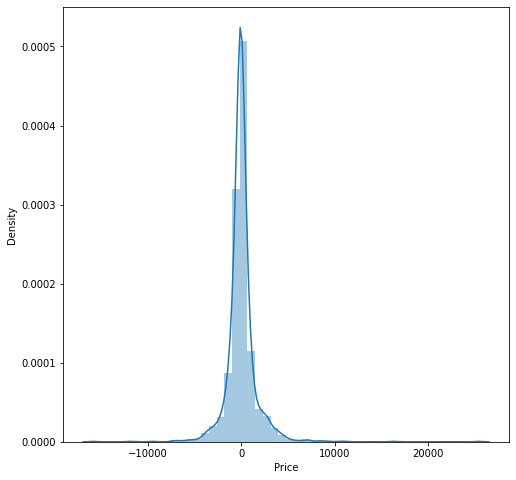

In [84]:
pred=model.predict(X_test)
plt.figure(figsize = (8,8))
sns.distplot(y_test-pred)
plt.show()

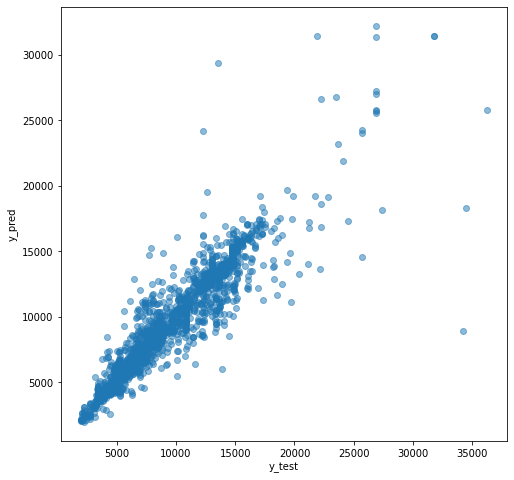

In [85]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [87]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 892.7351478697643
MSE: 2769822.2427218053
RMSE: 1664.2782948539002


### **Saving the Model**

In [88]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rate_rf.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)

In [90]:
temp = open('flight_rate_rf.pkl','rb')
fin = pickle.load(temp)

In [91]:
pred_fin = fin.predict(X_test)

In [92]:
metrics.r2_score(y_test, pred_fin)

0.8632547468213152